<a href="https://colab.research.google.com/github/bunnyvilliers17/Heart-Disease-Prediction-Using-ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix

**IMPORTING THE DATASET**

In [ ]:
data = pd.read_csv("heart.csv")

## **Exploratory Data Analysis**

In [ ]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236

Data contains;
*   age - age in years
*   sex - (1 = male; 0 = female)
*   cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* hol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(len(data))
print('Data Shape',data.shape)

303
Data Shape (303, 14)


In [ ]:
describe = data.describe() 
print(describe.T)

          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277

In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Target Visualization
* The "goal" field refers to the presence of heart disease in the patient. Target = 1 => presence of heart disease Target = 0 => no of heart disease

1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


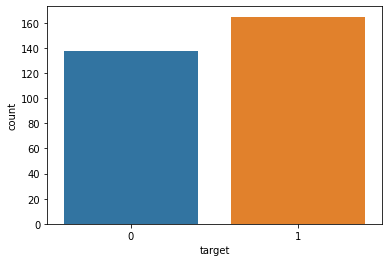

In [ ]:
sns.countplot(data['target']) 
print(data.target.value_counts())

**Correlation Matrix of Features**

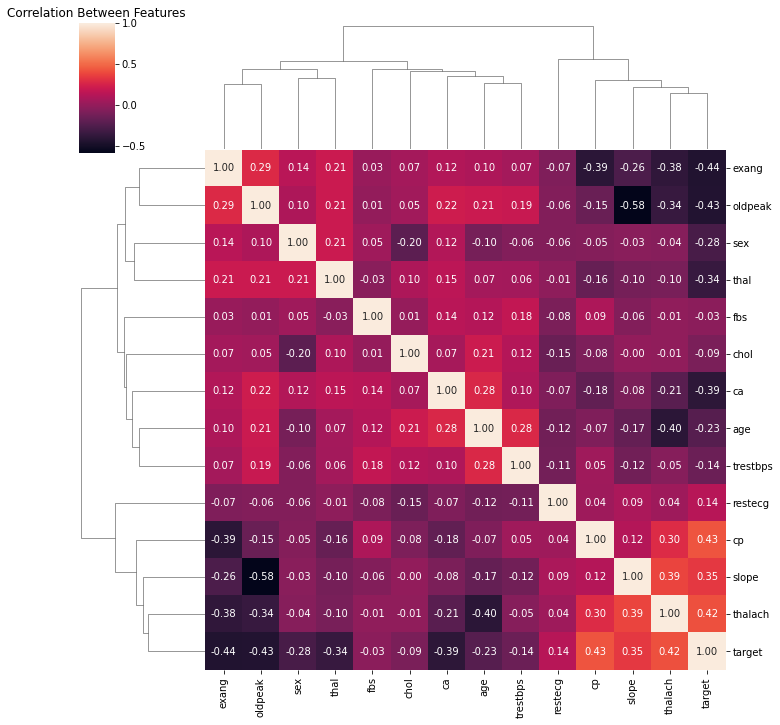

In [ ]:
corr_data = data.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

**Correlation Matrix of Features (with Threshold)**

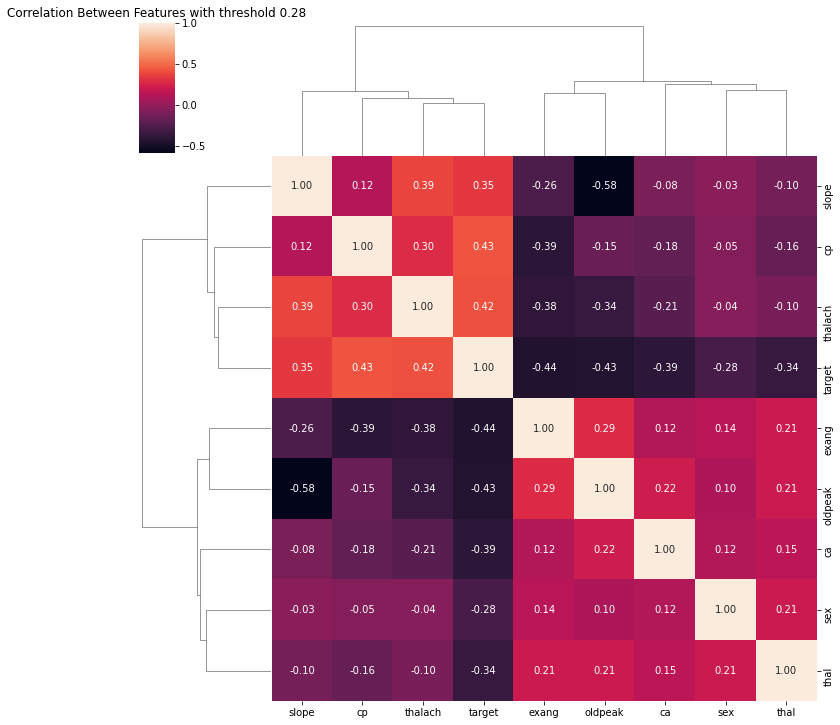

In [ ]:
threshold = 0.28 
filtre = np.abs(corr_data['target']) > threshold 
corr_feature = corr_data.columns[filtre].tolist()
sns.clustermap(data[corr_feature].corr(),annot= True,fmt = '.2f')
plt.title('Correlation Between Features with threshold 0.28')
plt.show();

**Box Plotting before Standardization**

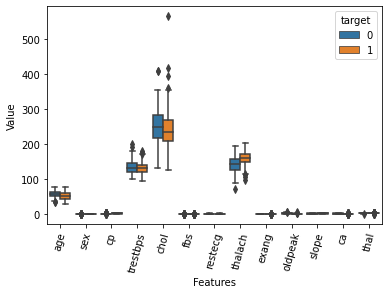

In [ ]:
data_melted = pd.melt(data,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted)
plt.xticks(rotation=75) 
plt.show()

**Pair Plotting before Standardization**

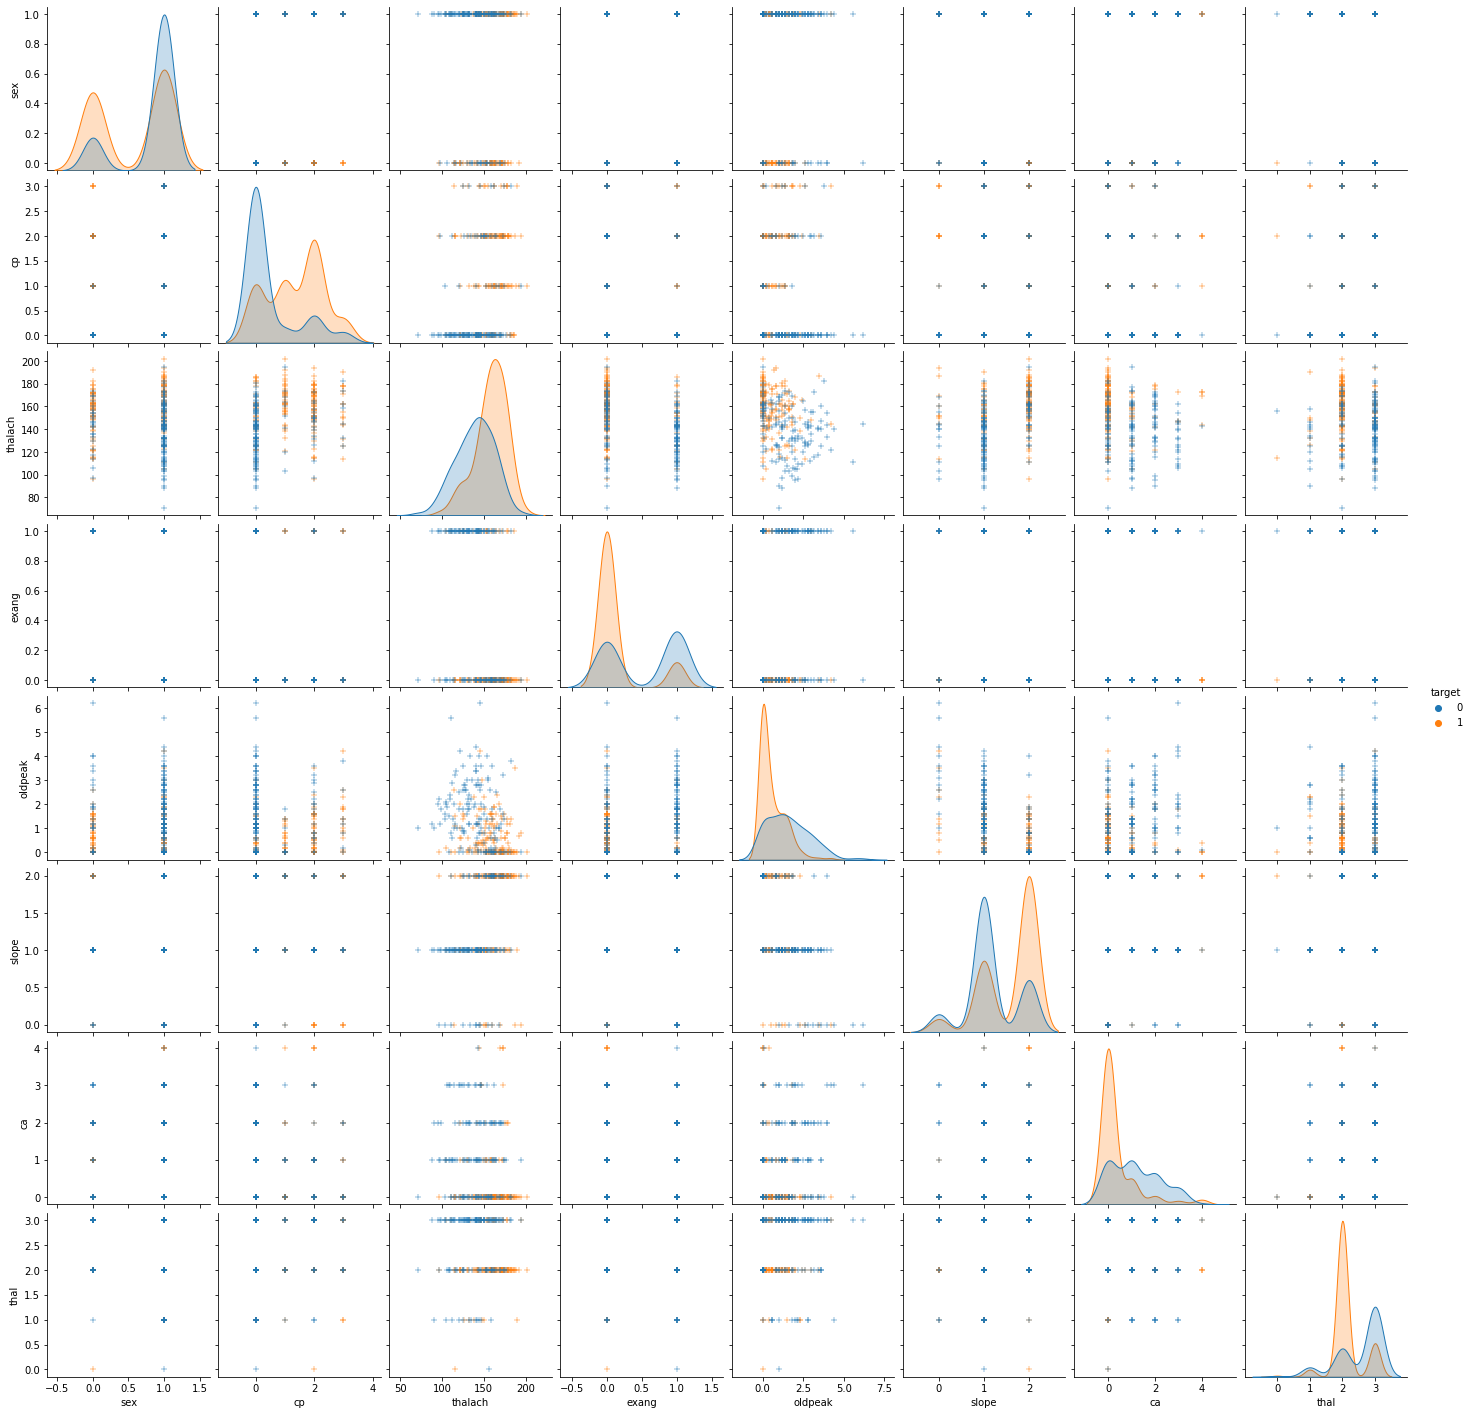

In [ ]:
sns.pairplot(data[corr_feature],diag_kind='kde',markers='+',hue='target')
plt.show()

**Box plotting after standardization**

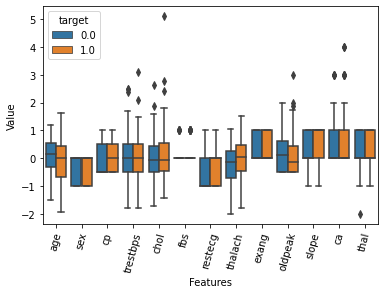

In [ ]:
x = data.drop(['target'],axis=1) 
y = data.target
columns = x.columns.tolist()
test_size = 0.2
x = RobustScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)
x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted)
plt.xticks(rotation=75) 
plt.show()

**Pair plotting after standardization**

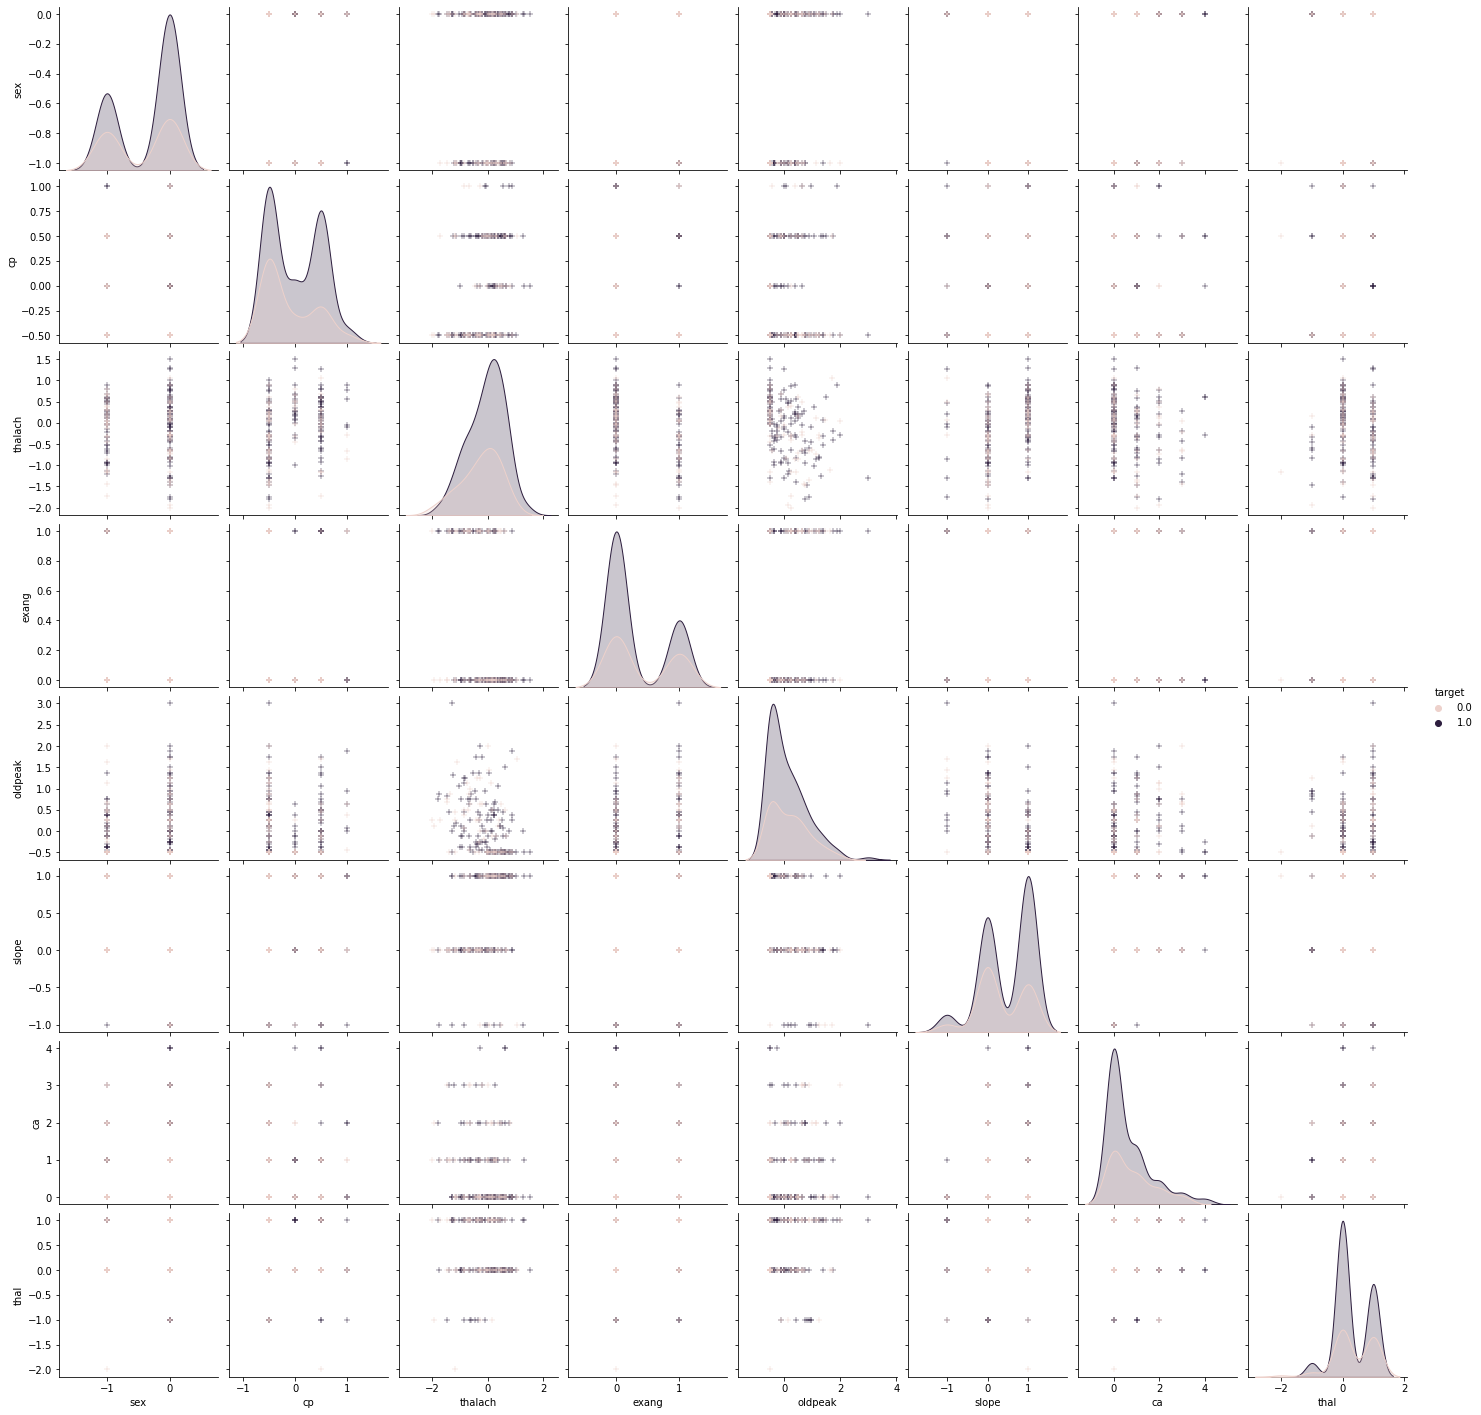

In [ ]:
sns.pairplot(x_train_df[corr_feature],diag_kind='kde',markers='+',hue='target')
plt.show()